# Main Research Questions:
1. How have global CO2 emission rates changed over time? In particular for the US, and how does the US compare to other countries?
2. Are CO2 emissions in the US, global temperatures, and natural disaster rates in the US associated?

# What is the data?

In this case study, based on the Bloomberg Open Case Study on Exploring CO2 Emissions across time, we will be using data related to CO2 emissions, as well as other data that may influence, be influenced or relate to CO2 emissions. Most of our data is from Gapminder that was originally obtained from the World Bank.

In addition, we will use some data that is specific to the United States from the National Oceanic and Atmospheric Administration (NOAA), which is an agency that collects weather and climate data.

We will first import our libraries that we will use. Then, we will begin importing all of our data files. All of these data files are the exact data files that Bloomberg Open Case Study used.

In [69]:
import pandas as pd
import numpy as np

# Data Import

# import CO2 emissions data
CO2_raw = pd.read_excel("yearly_co2_emissions_1000_tonnes (1).xlsx")  
CO2_raw.head() 

country  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

       2005      2006      2007      2008      2009      2010      2011  \
0    1330.0    1650.0    2270.0    4210.0    6770.0    8460.0   12200.0   
1    4250.0    3900.0    3930.0    4370.0    4380.0    4600.0    5240.0   
2  107000.0  101000.0  109000.0  110000.0  121000.0  119000.0  121000.0   
3     576.0     546.0     539.0     539.0     517.0     517.0     491.0   
4   19200.0   22300.0   25200.0   25700.0   27800.0   29100.0   30300.0   

       2012      2013      2014  
0   10800.0   10000.0    9810.0  
1    4910.0    5060.0    5720.0  
2  130000.0  134000.0  145000.0  
3     488.0     477.0     462.0  
4   33400.0   32600.0   34800.0  

[5 rows x 265 columns]

In [70]:
# import temperature data
temp_raw = pd.read_csv("temperature.csv")
temp_raw.head()

Contiguous U.S.  Average Temperature  January-December
0  Units: Degrees Fahrenheit                  NaN               NaN
1     Base Period: 1901-2000                  NaN               NaN
2               Missing: -99                  NaN               NaN
3                       Date                Value           Anomaly
4                     189512                50.34             -1.68

In [71]:
# import GDP per capita data
gdp_pc_raw = pd.read_excel("gdp_per_capita_yearly_growth.xlsx")
gdp_pc_raw.head()

country     1801     1802     1803     1804     1805     1806     1807  \
0  Afghanistan      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      Albania  0.10400  0.10400  0.10400  0.10400  0.10400  0.10400  0.10400   
2      Algeria -0.00247 -0.00247 -0.00247 -0.00247 -0.00247 -0.00247 -0.00247   
3      Andorra  0.16600  0.16600  0.16600  0.16600  0.16600  0.16600  0.16600   
4       Angola  0.42500  0.42500  0.42500  0.42500  0.42500  0.42500  0.42500   

      1808     1809  ...   2010   2011   2012  2013   2014  2015  2016   2017  \
0      NaN      NaN  ...  5.170  3.850  11.20  1.13  0.837  2.11  2.68  2.760   
1  0.10400  0.10400  ...  2.980  2.490   2.28  1.72  2.610  3.82  4.72  5.030   
2 -0.00247 -0.00247  ...  2.060  0.857   1.16  1.61  2.180  2.10  2.36  2.500   
3  0.16600  0.16600  ... -4.780 -4.300    NaN   NaN    NaN   NaN   NaN    NaN   
4  0.42500  0.42500  ...  0.594  1.030   2.13  1.03  2.240  2.46  2.77  0.262   

   2018  2019  
0  3.02  3.38  
1  5.03  5.23  
2  2.63  2.68  
3   NaN   NaN  
4  3.46  3.55  

[5 rows x 220 columns]

In [72]:
# import energy use per person data
energy_raw = pd.read_excel("energy_use_per_person.xlsx")
energy_raw.head()

country  1960  1961  1962  1963  1964  1965  1966  1967  1968  \
0              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2006    2007    2008    2009    2010    2011    2012    2013  \
0  ...   707.0   680.0   711.0   732.0   729.0   765.0   688.0   801.0   
1  ...  1030.0  1070.0  1070.0  1150.0  1110.0  1140.0  1220.0  1240.0   
2  ...   456.0   470.0   491.0   514.0   521.0   522.0   553.0   534.0   
3  ...  1580.0  1600.0     NaN     NaN     NaN     NaN     NaN     NaN   
4  ...  1840.0  1850.0  1920.0  1850.0  1910.0  1930.0  1920.0  1950.0   

     2014  2015  
0   808.0   NaN  
1  1320.0   NaN  
2   545.0   NaN  
3     NaN   NaN  
4  2020.0   NaN  

[5 rows x 57 columns]

In [73]:
# import disasters data
disasters_raw = pd.read_csv("disasters (1).csv", skiprows=2)
disasters_raw.head()

Year  Drought Count  Drought Cost  Drought Lower 75  Drought Upper 75  \
0  1980              1          33.2              26.4              39.6   
1  1981              0           0.0               0.0               0.0   
2  1982              0           0.0               0.0               0.0   
3  1983              1           7.8               5.5               9.0   
4  1984              0           0.0               0.0               0.0   

   Drought Lower 90  Drought Upper 90  Drought Lower 95  Drought Upper 95  \
0              24.5              41.6              23.4              42.8   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               5.0               9.9               4.6              10.6   
4               0.0               0.0               0.0               0.0   

   Flooding Count  ...  Wildfire Lower 95  Wildfire Upper 95  \
0               1  ...                0.0                0.0   
1               0  ...                0.0                0.0   
2               0  ...                0.0                0.0   
3               2  ...                0.0                0.0   
4               0  ...                0.0                0.0   

   Winter Storm Count  Winter Storm Cost  Winter Storm Lower 75  \
0                   0                0.0                    0.0   
1                   0                0.0                    0.0   
2                   1                1.8                    1.2   
3                   0                0.0                    0.0   
4                   0                0.0                    0.0   

   Winter Storm Upper 75  Winter Storm Lower 90  Winter Storm Upper 90  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    1.9                    1.1                    2.2   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Winter Storm Lower 95  Winter Storm Upper 95  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.1                    2.6  
3                    0.0                    0.0  
4                    0.0                    0.0  

[5 rows x 57 columns]

# Data Wrangling

# Yearly CO2 Emissions:

We will begin with taking a look at what our data looks like and capitalizing the country column. To look at a variety of our data, we will take a random sample and set the seed to 123, ensuring that we always get the same random sample each time the code is ran.

In [74]:
import random

CO2_raw = CO2_raw.rename(columns={'country' : 'Country'})
CO2_raw.sample(n=3, random_state=123)

Country  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
172           Togo   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
26    Burkina Faso   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
41   Cote d'Ivoire   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

       2005    2006    2007    2008    2009    2010    2011    2012     2013  \
172  1340.0  1220.0  1410.0  1680.0  2780.0  2640.0  2460.0  2490.0   2660.0   
26   1130.0  1360.0  1650.0  1920.0  1930.0  1960.0  2210.0  2630.0   3060.0   
41   7830.0  7000.0  6780.0  6780.0  5660.0  6970.0  7250.0  9300.0  10700.0   

        2014  
172   2620.0  
26    2850.0  
41   11000.0  

[3 rows x 265 columns]

To create the graphs, we want to have tidy data, so we will make all the years in a column, instead of each being a column. The values will then become our emissions variable.

In [75]:
CO2_long = pd.melt(CO2_raw, id_vars=['Country'],
                   value_vars=[col for col in CO2_raw.columns if col != 'Country'],
                   var_name='Year',
                       value_name = 'Emissions')

print(CO2_long.sample(n=6, random_state=123))

           Country  Year  Emissions
30030         Iraq  1907        NaN
16589         Iran  1837        NaN
50687     Zimbabwe  2014    12000.0
32758        Nauru  1921        NaN
12017   Montenegro  1813        NaN
2112   Afghanistan  1762        NaN


In general, for the years, we want to ensure they are numerical values since we may manipulate the "Year" column later on when we graph. So, let's convert "Year" to a numerical value here and check to see if we did it correctly.

In [76]:
CO2_long['Year'] = pd.to_numeric(CO2_long["Year"], errors="coerce")
CO2_long['Year'].dtype

dtype('int64')

Since we will want to combine all these datasets later, we want to add a label so that we can easily see the measurement the values are in. To do this, we will add a new column, "Label".

In [77]:
CO2_long["Label"] = "CO2 Emissions (Metric Tons)"
print(CO2_long.sample(n=6, random_state=123))

           Country  Year  Emissions                        Label
30030         Iraq  1907        NaN  CO2 Emissions (Metric Tons)
16589         Iran  1837        NaN  CO2 Emissions (Metric Tons)
50687     Zimbabwe  2014    12000.0  CO2 Emissions (Metric Tons)
32758        Nauru  1921        NaN  CO2 Emissions (Metric Tons)
12017   Montenegro  1813        NaN  CO2 Emissions (Metric Tons)
2112   Afghanistan  1762        NaN  CO2 Emissions (Metric Tons)


Let's also make sure that our data looks correct before we move on. We'll check to see all of our country names.

In [78]:
CO2_long["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

Since it looks good, let's move on to the next dataset.

Yearly Growth in GDP per Capita

Before we begin cleaning up our data, let's see how the data is organized and if it looks correct.

In [79]:
gdp_pc_raw.shape

(194, 220)

In [80]:
# rename country column
gdp_pc_raw = gdp_pc_raw.rename(columns= {"country" : "Country"})

# check to see the columnn names
gdp_pc_raw.columns

Index(['Country',      1801,      1802,      1803,      1804,      1805,
            1806,      1807,      1808,      1809,
       ...
            2010,      2011,      2012,      2013,      2014,      2015,
            2016,      2017,      2018,      2019],
      dtype='object', length=220)

Since our data is in wide format with all the years as column names, we will make it tidy. We changed the country column name so that it is consistent with the rest of our dataframes. The same goes for adding the label for the units of measurement.

In [81]:
# covert GDP per capita into long dataframe
gdp_pc_long = pd.melt(gdp_pc_raw, id_vars= "Country",
                      value_vars= [col for col in gdp_pc_raw if col !="Country"],
                      var_name= "Year",
                          value_name= "GDP")

# add a label for units
gdp_pc_long["Label"] = "GDP Growth/Capita"
print(gdp_pc_long.sample(n=6, random_state=123))

              Country  Year      GDP              Label
39829          France  2006   1.7400  GDP Growth/Capita
27264            Mali  1941   0.0187  GDP Growth/Capita
11614     Switzerland  1860 -13.5000  GDP Growth/Capita
41550           Chile  2015   3.1500  GDP Growth/Capita
8930        Argentina  1847   1.4100  GDP Growth/Capita
12321  Macedonia, FYR  1864  -0.0730  GDP Growth/Capita


In [82]:
# convert years to numeric values
gdp_pc_long['Year']= pd.to_numeric(gdp_pc_long["Year"], errors="coerce")
gdp_pc_long['Year'].dtype

dtype('int64')

In [83]:
gdp_pc_long['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

# Energy Use per Person

Again, let's check to see if our data looks alright and get an idea of what to change. 

In [84]:
energy_raw.head()

country  1960  1961  1962  1963  1964  1965  1966  1967  1968  \
0              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2006    2007    2008    2009    2010    2011    2012    2013  \
0  ...   707.0   680.0   711.0   732.0   729.0   765.0   688.0   801.0   
1  ...  1030.0  1070.0  1070.0  1150.0  1110.0  1140.0  1220.0  1240.0   
2  ...   456.0   470.0   491.0   514.0   521.0   522.0   553.0   534.0   
3  ...  1580.0  1600.0     NaN     NaN     NaN     NaN     NaN     NaN   
4  ...  1840.0  1850.0  1920.0  1850.0  1910.0  1930.0  1920.0  1950.0   

     2014  2015  
0   808.0   NaN  
1  1320.0   NaN  
2   545.0   NaN  
3     NaN   NaN  
4  2020.0   NaN  

[5 rows x 57 columns]

We'll then tidy up the data like the other datasets.

In [85]:
# rename "country" column
energy_raw = energy_raw.rename(columns={"country" : "Country"})

# convert to tidy data
energy_long = pd.melt(energy_raw, id_vars="Country",
                      value_vars= [col for col in energy_raw.columns if col !="Country"], 
                      var_name= "Year",
                        value_name = "Energy")

# add label for units
energy_long["Label"] = "Energy Use (kg, oil-eq./capita)"

print(energy_long.sample(n=3, random_state=123))

        Country  Year  Energy                            Label
1018  Argentina  1966     NaN  Energy Use (kg, oil-eq./capita)
6375     Russia  1997  4070.0  Energy Use (kg, oil-eq./capita)
2803    Morocco  1976   235.0  Energy Use (kg, oil-eq./capita)


In [86]:
# check Country variable
energy_long["Country"].unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy'

# US Disasters

Note that this data is only for the US, unlike the previous datasets that has world data. Again, we'll check what the data looks like.

In [87]:
disasters_raw.head(n=6)

Year  Drought Count  Drought Cost  Drought Lower 75  Drought Upper 75  \
0  1980              1          33.2              26.4              39.6   
1  1981              0           0.0               0.0               0.0   
2  1982              0           0.0               0.0               0.0   
3  1983              1           7.8               5.5               9.0   
4  1984              0           0.0               0.0               0.0   
5  1985              0           0.0               0.0               0.0   

   Drought Lower 90  Drought Upper 90  Drought Lower 95  Drought Upper 95  \
0              24.5              41.6              23.4              42.8   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               5.0               9.9               4.6              10.6   
4               0.0               0.0               0.0               0.0   
5               0.0               0.0               0.0               0.0   

   Flooding Count  ...  Wildfire Lower 95  Wildfire Upper 95  \
0               1  ...                0.0                0.0   
1               0  ...                0.0                0.0   
2               0  ...                0.0                0.0   
3               2  ...                0.0                0.0   
4               0  ...                0.0                0.0   
5               0  ...                0.0                0.0   

   Winter Storm Count  Winter Storm Cost  Winter Storm Lower 75  \
0                   0                0.0                    0.0   
1                   0                0.0                    0.0   
2                   1                1.8                    1.2   
3                   0                0.0                    0.0   
4                   0                0.0                    0.0   
5                   1                2.0                    2.1   

   Winter Storm Upper 75  Winter Storm Lower 90  Winter Storm Upper 90  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    1.9                    1.1                    2.2   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   
5                    2.3                    2.1                    2.3   

   Winter Storm Lower 95  Winter Storm Upper 95  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.1                    2.6  
3                    0.0                    0.0  
4                    0.0                    0.0  
5                    2.0                    2.4  

[6 rows x 57 columns]

For our purpose, we only care about the number of disasters occuring each year, so we will filter out the data to only include the columns with "Count" in it. 

In [88]:
disasters_raw = disasters_raw[[col for col in disasters_raw.columns if "Count" in col or col=="Year"]]
disasters_raw.head(n=6)

Year  Drought Count  Flooding Count  Freeze Count  Severe Storm Count  \
0  1980              1               1             0                   0   
1  1981              0               0             1                   1   
2  1982              0               0             0                   2   
3  1983              1               2             1                   0   
4  1984              0               0             0                   2   
5  1985              0               0             1                   0   

   Tropical Cyclone Count  Wildfire Count  Winter Storm Count  
0                       1               0                   0  
1                       0               0                   0  
2                       0               0                   1  
3                       1               0                   0  
4                       0               0                   0  
5                       3               0                   1

In [89]:
# add a column for total yearly disasters
disasters_raw["Disasters"]= disasters_raw.drop(["Year"], axis=1).sum(axis= 1)
disasters_raw.head(n=6)

Year  Drought Count  Flooding Count  Freeze Count  Severe Storm Count  \
0  1980              1               1             0                   0   
1  1981              0               0             1                   1   
2  1982              0               0             0                   2   
3  1983              1               2             1                   0   
4  1984              0               0             0                   2   
5  1985              0               0             1                   0   

   Tropical Cyclone Count  Wildfire Count  Winter Storm Count  Disasters  
0                       1               0                   0          3  
1                       0               0                   0          2  
2                       0               0                   1          3  
3                       1               0                   0          5  
4                       0               0                   0          2  
5                       3               0                   1          5

Because we want to combine these datasets together later, we want to add a column for "Country" so that it's consistent with the other datasets. We will then tidy up the data and make it the same as the previous datasets.

In [90]:
# add a column to label the country as US
disasters_raw["Country"] = "United States"

# tidy the dataframe
disasters_long = pd.melt(disasters_raw, id_vars= "Year",
                         value_vars= "Disasters",
                         var_name= "Indicator",
                             value_name= "Value")

# add column to label what value measures
disasters_long["Label"]= "Number of Disasters"

disasters_long.head()

Year  Indicator  Value                Label
0  1980  Disasters      3  Number of Disasters
1  1981  Disasters      2  Number of Disasters
2  1982  Disasters      3  Number of Disasters
3  1983  Disasters      5  Number of Disasters
4  1984  Disasters      2  Number of Disasters

# US Temperature

Again, we'll take a glance at the data first.

In [91]:
temp_raw.head(n=10)

Contiguous U.S.  Average Temperature  January-December
0  Units: Degrees Fahrenheit                  NaN               NaN
1     Base Period: 1901-2000                  NaN               NaN
2               Missing: -99                  NaN               NaN
3                       Date                Value           Anomaly
4                     189512                50.34             -1.68
5                     189612                51.99             -0.03
6                     189712                51.56             -0.46
7                     189812                51.43             -0.59
8                     189912                51.01             -1.01
9                     190012                52.77              0.75

The first four rows seem to not be our values, but our fourth row seems to tell column names. However, to clean it up nicely, let's eliminate the first four rows so that they are all values, and we will change the column names later to be consistent with the fourth row. 

In [92]:
temp_raw = temp_raw.iloc[4:].reset_index(drop=True)
temp_raw.head()

Contiguous U.S.  Average Temperature  January-December
0          189512                50.34             -1.68
1          189612                51.99             -0.03
2          189712                51.56             -0.46
3          189812                51.43             -0.59
4          189912                51.01             -1.01

Interesting, our data column doesn't have the 4 digit year number that we normally have. It seems like the pattern is to have an additional "12" at the end of each number, but let's make sure. 

In [93]:
date_length = temp_raw["Contiguous U.S."].astype(str).str.len()
date_length.unique

<bound method Series.unique of 0      6
1      6
2      6
3      6
4      6
      ..
120    6
121    6
122    6
123    6
124    6
Name: Contiguous U.S., Length: 125, dtype: int64>

Since that's good, we will then check if all of our data ends in 12. We should get an output of 125, which is the length of our dataset. 

In [94]:
date_twelve= temp_raw["Contiguous U.S."].astype(str).str.endswith('12')
date_twelve.shape

(125,)

In [95]:
# remove "12" from all the dates
temp_raw["Contiguous U.S."]= temp_raw["Contiguous U.S."].str.replace("12", "")
temp_raw.head()

Contiguous U.S.  Average Temperature  January-December
0            1895                50.34             -1.68
1            1896                51.99             -0.03
2            1897                51.56             -0.46
3            1898                51.43             -0.59
4            1899                51.01             -1.01

In [96]:
temp_raw.columns

Index(['Contiguous U.S.', ' Average Temperature', ' January-December'], dtype='object')

In [97]:
# drop the anomaly column (' January-December')
temp_clean = temp_raw.drop(columns= ' January-December')
temp_clean.head()

Contiguous U.S.  Average Temperature
0            1895                50.34
1            1896                51.99
2            1897                51.56
3            1898                51.43
4            1899                51.01

In [98]:
# add a column for country, like the other dataframes
temp_clean.insert(1, "Country", "United States")

# change column names of years and temperature
temp_clean = temp_clean.rename(columns={'Contiguous U.S.' : 'Year'})
temp_clean = temp_clean.rename(columns={' Average Temperature' : 'Value'})

# add label columns 
temp_clean.insert(2, "Indicator", "Temperature")
temp_clean["Label"] = "Temperature (Fahrenheit)"

temp_clean.head()

Year        Country    Indicator  Value                     Label
0  1895  United States  Temperature  50.34  Temperature (Fahrenheit)
1  1896  United States  Temperature  51.99  Temperature (Fahrenheit)
2  1897  United States  Temperature  51.56  Temperature (Fahrenheit)
3  1898  United States  Temperature  51.43  Temperature (Fahrenheit)
4  1899  United States  Temperature  51.01  Temperature (Fahrenheit)

Joining the Data:

Check all the summaries of the column names of each dataset to decide which ones to combine.

In [99]:
CO2_long.describe(include='all')

Country          Year     Emissions                        Label
count         50688  50688.000000  1.691600e+04                        50688
unique          192           NaN           NaN                            1
top     Afghanistan           NaN           NaN  CO2 Emissions (Metric Tons)
freq            264           NaN           NaN                        50688
mean            NaN   1882.500000  8.380757e+04                          NaN
std             NaN     76.210441  4.077764e+05                          NaN
min             NaN   1751.000000  2.560000e-02                          NaN
25%             NaN   1816.750000  5.500000e+02                          NaN
50%             NaN   1882.500000  4.390000e+03                          NaN
75%             NaN   1948.250000  3.192500e+04                          NaN
max             NaN   2014.000000  1.030000e+07                          NaN

In [100]:
gdp_pc_long.describe(include='all')

Country          Year           GDP              Label
count         42486  42486.000000  40094.000000              42486
unique          194           NaN           NaN                  1
top     Afghanistan           NaN           NaN  GDP Growth/Capita
freq            219           NaN           NaN              42486
mean            NaN   1910.000000      1.301556                NaN
std             NaN     63.219939      4.751197                NaN
min             NaN   1801.000000    -67.500000                NaN
25%             NaN   1855.000000      0.133000                NaN
50%             NaN   1910.000000      0.633000                NaN
75%             NaN   1965.000000      2.160000                NaN
max             NaN   2019.000000    145.000000                NaN

In [101]:
energy_long.describe(include='all')

Country    Year        Energy                            Label
count      9464  9464.0   5920.000000                             9464
unique      169    56.0           NaN                                1
top     Albania  1960.0           NaN  Energy Use (kg, oil-eq./capita)
freq         56   169.0           NaN                             9464
mean        NaN     NaN   2238.824079                              NaN
std         NaN     NaN   2631.087398                              NaN
min         NaN     NaN      9.580000                              NaN
25%         NaN     NaN    505.750000                              NaN
50%         NaN     NaN   1185.000000                              NaN
75%         NaN     NaN   3030.000000                              NaN
max         NaN     NaN  22000.000000                              NaN

It looks like we will want to combine our country and years together since the values overlap. However, our label doesn't fully overlap. We'll also note that the minimum and maximum years are different in the three datasets.

In [102]:
joint_raw = CO2_long.merge(energy_long, how='outer')
joint_raw = joint_raw.merge(gdp_pc_long, how='outer')
joint_raw.sample(n=15, random_state=123)

Country  Year  Emissions                            Label  \
47727      Kyrgyz Republic  1850      0.381      CO2 Emissions (Metric Tons)   
26048             Dominica  2008    132.000      CO2 Emissions (Metric Tons)   
31390              Finland  1992  47500.000      CO2 Emissions (Metric Tons)   
62720              Namibia  1915        NaN      CO2 Emissions (Metric Tons)   
87265             Suriname  1849        NaN      CO2 Emissions (Metric Tons)   
59534               Monaco  1807        NaN                GDP Growth/Capita   
35152               Greece  1988        NaN  Energy Use (kg, oil-eq./capita)   
91548          Timor-Leste  1834        NaN                GDP Growth/Capita   
9422                Belize  1961     36.700      CO2 Emissions (Metric Tons)   
66396              Nigeria  1894        NaN                GDP Growth/Capita   
16901           Cape Verde  1976     73.300      CO2 Emissions (Metric Tons)   
40959            Indonesia  1966        NaN  Energy Use (kg, oil-eq./capita)   
85169  St. Kitts and Nevis  1879        NaN      CO2 Emissions (Metric Tons)   
37410               Guyana  1812        NaN      CO2 Emissions (Metric Tons)   
32948               Gambia  1972        NaN  Energy Use (kg, oil-eq./capita)   

       Energy    GDP  
47727     NaN    NaN  
26048     NaN    NaN  
31390     NaN    NaN  
62720     NaN    NaN  
87265     NaN    NaN  
59534     NaN  0.166  
35152  1900.0    NaN  
91548     NaN  0.183  
9422      NaN    NaN  
66396     NaN  0.441  
16901     NaN    NaN  
40959     NaN    NaN  
85169     NaN    NaN  
37410     NaN    NaN  
32948     NaN    NaN

We will then want to make a long version of the data. We'll use the variable "Indicator" to show which dataset the value came from. 

In [103]:
value_vars = ["GDP", "Emissions", "Energy"]

joint_long = joint_raw.melt(
    id_vars=["Country", "Year"],
    value_vars= value_vars,
    var_name="Indicator",
    value_name="Value"
)

label_map ={
    "GDP" : "GDP Growth/Capita (%)",
    "Emissions" : "CO2 Emissions (Metric Tons)",
    "Energy" : "Energy Use (kg, oil-eq./capita)"
}

# add the "Label" column back with the units of measurement for each indicator
joint_long["Label"] = joint_long["Indicator"].map(label_map)

(joint_long.sample(n=6, random_state=123))

Country  Year  Indicator    Value  \
20682       Congo, Dem. Rep.  2017        GDP  4.14000   
1073                 Algeria  1801        GDP -0.00247   
113313               Bolivia  1758  Emissions      NaN   
96827   United Arab Emirates  1835        GDP      NaN   
186474           South Sudan  2000  Emissions      NaN   
204579                Zambia  1964  Emissions      NaN   

                              Label  
20682         GDP Growth/Capita (%)  
1073          GDP Growth/Capita (%)  
113313  CO2 Emissions (Metric Tons)  
96827         GDP Growth/Capita (%)  
186474  CO2 Emissions (Metric Tons)  
204579  CO2 Emissions (Metric Tons)

In [104]:
# combine the US disasters and temperature datasets with the joint data
data_long = pd.concat([joint_long, disasters_long, temp_clean], ignore_index=True)

# check
print(data_long["Indicator"].unique())

['GDP' 'Emissions' 'Energy' 'Disasters' 'Temperature']


In [105]:
# add Region variable to indicate if data about US or different country
data_long["Region"] = np.where(
    data_long["Country"] == "United States",
    "United States",
    "Rest of the World")

# drop NaN values
data_long = data_long.dropna()

# convert values to numeric
data_long["Value"] = pd.to_numeric(data_long["Value"], errors="coerce")

data_long.sample(n=10, random_state=123)

Country  Year    Indicator       Value  \
8328           Belarus  1953          GDP       2.520   
100102       Venezuela  1855          GDP       0.429   
241581       Guatemala  2013       Energy     772.000   
1515           Algeria  2001          GDP       1.130   
307956   United States  1897  Temperature      51.560   
217975          Brazil  1975       Energy     846.000   
113195          Bhutan  1980    Emissions      22.000   
73271         Portugal  1884          GDP       2.550   
200392  United Kingdom  2006    Emissions  541000.000   
68550         Pakistan  1893          GDP       2.350   

                                  Label             Region  
8328              GDP Growth/Capita (%)  Rest of the World  
100102            GDP Growth/Capita (%)  Rest of the World  
241581  Energy Use (kg, oil-eq./capita)  Rest of the World  
1515              GDP Growth/Capita (%)  Rest of the World  
307956         Temperature (Fahrenheit)      United States  
217975  Energy Use (kg, oil-eq./capita)  Rest of the World  
113195      CO2 Emissions (Metric Tons)  Rest of the World  
73271             GDP Growth/Capita (%)  Rest of the World  
200392      CO2 Emissions (Metric Tons)  Rest of the World  
68550             GDP Growth/Capita (%)  Rest of the World

# Data Visualization

# CO2 Emissions Graph

In [106]:
# import plotting libraries
!pip install lets_plot
from lets_plot import* 

LetsPlot.setup_html()

For our first graph, we want to plot the world's CO2 emissions, so we will create a new dataframe that only takes the emissions from data_long.

In [107]:
CO2_visuals = data_long[data_long["Indicator"]=="Emissions"]
CO2_visuals.head()

Country  Year  Indicator  Value                        Label  \
102984  Afghanistan  1949  Emissions   14.7  CO2 Emissions (Metric Tons)   
102986  Afghanistan  1950  Emissions   84.3  CO2 Emissions (Metric Tons)   
102988  Afghanistan  1951  Emissions   91.7  CO2 Emissions (Metric Tons)   
102990  Afghanistan  1952  Emissions   91.7  CO2 Emissions (Metric Tons)   
102992  Afghanistan  1953  Emissions  106.0  CO2 Emissions (Metric Tons)   

                   Region  
102984  Rest of the World  
102986  Rest of the World  
102988  Rest of the World  
102990  Rest of the World  
102992  Rest of the World

We then want to combine all of the countries' values into one value so that we have one line of the world's emissions each year. We will rename the column to "Emissions" so that it is clear which value we are looking at. 

In [108]:
CO2_visuals_sum = CO2_visuals.groupby("Year", as_index=False)["Value"].sum()
CO2_visuals_sum = CO2_visuals_sum.rename(columns={"Value": "Emissions"})
CO2_visuals_sum.head()

Year  Emissions
0  1751     9360.0
1  1752     9360.0
2  1753     9360.0
3  1754     9370.0
4  1755     9370.0

In [109]:
CO2_visuals_sum["Year"]=CO2_visuals_sum["Year"].astype(int)

In [110]:
CO2_visuals_sum["Year"].dtype

dtype('int64')

We will then use ggplot() and geom_line() to create a line graph. 

In [112]:
CO2_world= (
    ggplot(data=CO2_visuals_sum, mapping=aes(x="Year", y="Emissions"))
    + geom_line(size=1.5)
    + labs(
        title="World CO₂ Emissions per Year (1751–2014)",
        subtitle="Limited to reporting countries",
        y="Emissions (Metric Tonnes)",
        x="Year"
    )
    + scale_x_continuous((1750, 2014, 50), format="~")
    + theme(
        plot_title=element_text(size=16),
        plot_subtitle=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_title_x=element_text(size=12)
    )
)
CO2_world

For future graphs, we'll assign our font sizes as my_theme so that we don't have to retype it out each time.

In [113]:
my_theme = theme(
    plot_title=element_text(size=16),
    plot_subtitle=element_text(size=12),
    axis_title_x=element_text(size=12),
    axis_title_y=element_text(size=12),
)

Then, we will save our plot so that we can use it in our summary plot.

In [114]:
ggsave(CO2_world, filename="/home/jovyan/CO2_world.png")

'/home/jovyan/CO2_world.png'

We now want to create a plot with each country's CO2 emissions, while making the US stand out. First, we want to simplify the dataframe to only include the country, year, and emissions value. We will also rename the column "Value" to "Emissions" so that it's clear which indicator the value comes from.

To graph it with gray lines, we will use scale_color_grey. We will make all the countries except the US one subplot and then just the US as another subplot. We will combine them later and add all the titles and aesthetics. 

# CO2 Emissions - Each Country w/ Color

In [115]:
# group data by country and year
CO2_visuals_countries = CO2_visuals.groupby(["Country", "Year"], as_index=False)["Value"].sum()
CO2_visuals_countries = CO2_visuals_countries.rename(columns={"Value": "Emissions"})

# plot the lines of all countries, except US
CO2_countries= geom_line(
    data=CO2_visuals_countries[CO2_visuals_countries["Country"] != "United States"],
    mapping=aes(x="Year", y="Emissions", group="Country"),
    color="gray", size=0.4,
    show_legend=False
)

# plot just US as a blue line
us_line = geom_line(
    data=CO2_visuals_countries[CO2_visuals_countries["Country"] == "United States"],
    mapping=aes(x="Year", y="Emissions", color="Country"),
    size=0.6
)

# combine the two plots
CO2_US_blue = (
    ggplot() 
    + CO2_countries
    + us_line 
    + scale_color_manual(values={"United States": "blue"}) 
    + labs(
        title="Country CO₂ Emissions per Year (1751–2014)",
        subtitle="Limited to reporting countries",
        y="Emissions (Metric Tonnes)",
        color="Country"
    ) 
    + theme(legend_position="right") 
    + scale_x_continuous(breaks=list(range(1750, 2014, 100)), format="") # scales the tickmarks & removes commas on numbers
    + my_theme 
)

CO2_US_blue

# Top 10 Emittors Graph

We will now graph the top ten emittors in 2014. Let's first find the those countries.

In [116]:
# find the top 10 emittors in 2014
top_emittors = CO2_visuals_countries[CO2_visuals_countries["Year"]== 2014].sort_values("Emissions", ascending=False).head(n=10)
top_emittors

Country  Year   Emissions
3367           China  2014  10300000.0
16186  United States  2014   5250000.0
6933           India  2014   2240000.0
12392         Russia  2014   1710000.0
7806           Japan  2014   1210000.0
5874         Germany  2014    720000.0
7163            Iran  2014    649000.0
12651   Saudi Arabia  2014    601000.0
13412    South Korea  2014    587000.0
2956          Canada  2014    537000.0

With the top 10 emittors in 2014, we will grab those countries data from CO2_visuals_countries dataframe. After filtering out the top 10 countries, we will just grab the data from 1900-2014. 

In [117]:
top_10 = CO2_visuals_countries[CO2_visuals_countries["Country"].isin([
    "China", "United States", "India", "Russia", "Japan", "Germany", "Iran", "Saudi Arabia", "South Korea", "Canada"])]
top_10 = top_10[top_10["Year"]>= 1900]

We will then graph top_10, which has the top 10 countries' emissions from 1900-2014. For the label, we will use top_emittors, which is just in 2014. The funcion geom_text_repel() will automatically add the arrors and space, so the labels will not overlap, which is exactly what we want. 

In [118]:
top_emittors_graph = (
    ggplot(data= top_10, mapping=aes(x="Year", y="Emissions", color="Country"))
    + geom_line(size=0.4)
    + scale_color_viridis()
    + labs(
        title="Top 10 Emissions-producing Countries in 2014 (1900–2014)",
        subtitle="Ordered by Emissions Produced in 2014",
        y="Emissions (Metric Tonnes)"
    )
    + my_theme
    + geom_text_repel(data= top_emittors, mapping=aes(label="Country"), size=6)
    + theme(legend_position="none")
    + scale_x_continuous(breaks=list(range(1900, 2014, 25)), format="")
)

top_emittors_graph

In [119]:
top_10["Year"] = pd.to_numeric(top_10["Year"], errors="coerce")
top_10["Year"].dtype

dtype('int64')

# Tile Plot

To create a graph with the countries going from highest emittor to lowest emittor, we will use pd.Categorical() to order the country column after sorting the countries by emissions. 

In [145]:
# filter to 2014 only
top_2014 = top_10[top_10["Year"] == 2014]

# sort countries by emissions (ascending)
ordered_countries = top_2014.sort_values("Emissions", ascending=True)["Country"]

# reorder 'Country' as a categorical variable
top_10["Country"] = pd.Categorical(
    top_10["Country"],
    categories=ordered_countries,
    ordered=True
)

# create a column for the natural log of the emissions
top_10["Ln(CO2 Emissions (Metric Tonnes))"] = np.log2(top_10["Emissions"])


# plot the graph
CO2_tile = (
    ggplot(data= top_10, 
           mapping=aes(x="Year", y="Country", fill="Ln(CO2 Emissions (Metric Tonnes))"))
    + geom_tile()
    + labs(
        title="Top 10 Emissions-producing Countries",
        subtitle="Ordered by Emissions Produced in 2014",
        y="Emissions (Metric Tonnes)"
    )
    + scale_fill_viridis()
    + theme(legend_position="bottom")
    + scale_x_continuous(breaks=list(range(1900, 2014, 5)), format="~") 
    + scale_y_discrete(limits=ordered_countries.tolist())
    + my_theme
)

CO2_tile

In [146]:
ggsave(CO2_tile, filename="/home/jovyan/CO2_tile.png")

'/home/jovyan/CO2_tile.png'

So that we can apply various functions to "Year" later, we will convert it to a numerical value. Then we will, assign data_facet to include only emissions, energy, and gdp in the dataframe. This enables us to then plot the facet_grid() later by differentiating the graphs by "Indicator". 

In [122]:
data_long["Year"] = pd.to_numeric(data_long["Year"], errors="coerce")

data_facet = data_long[data_long["Indicator"].isin(["Emissions", "Energy", "GDP"])]
data_facet

Country  Year Indicator    Value                            Label  \
91      Afghanistan  1821       GDP    0.325            GDP Growth/Capita (%)   
93      Afghanistan  1822       GDP    0.325            GDP Growth/Capita (%)   
95      Afghanistan  1823       GDP    0.325            GDP Growth/Capita (%)   
97      Afghanistan  1824       GDP    0.325            GDP Growth/Capita (%)   
99      Afghanistan  1825       GDP    0.325            GDP Growth/Capita (%)   
...             ...   ...       ...      ...                              ...   
307891     Zimbabwe  2009    Energy  662.000  Energy Use (kg, oil-eq./capita)   
307894     Zimbabwe  2010    Energy  671.000  Energy Use (kg, oil-eq./capita)   
307897     Zimbabwe  2011    Energy  713.000  Energy Use (kg, oil-eq./capita)   
307900     Zimbabwe  2012    Energy  735.000  Energy Use (kg, oil-eq./capita)   
307903     Zimbabwe  2013    Energy  750.000  Energy Use (kg, oil-eq./capita)   

                   Region  
91      Rest of the World  
93      Rest of the World  
95      Rest of the World  
97      Rest of the World  
99      Rest of the World  
...                   ...  
307891  Rest of the World  
307894  Rest of the World  
307897  Rest of the World  
307900  Rest of the World  
307903  Rest of the World  

[62930 rows x 6 columns]

To plot the emissions, energy, and gdp of the rest of the world and United States, we will use facet_grid(). With facet_grid(), we can create different plots based on the different "Indicator" and different "Region" variables. With facet_wrap(), we can only create different plots from one variable. To see different lines for each country, we will group="Country" in the aes() function. Since all the indicators have different scales, we will use scale="free_y" in facet_grid(). To add tickmarks on the x-axis for every 50 years, we will use scale_x_continuous(), where will also make sure to disregard any comma they put in the thousand place with format="".

In [123]:
facet_plot = (ggplot(
    data= data_facet, 
    mapping=aes(x="Year", y="Value", group= "Country"))
    + geom_line()
    + facet_grid(x="Region", y="Indicator", scales="free_y")
    + labs(
        title="Distribution of Indicators by Year and Value",
        y="Indicator Value",
        x="Year")
    + scale_x_continuous((1750, 2014, 50), format="")
    + my_theme
)
    
facet_plot

We will prepare the data so that we can graph the emissions and temperature from 1980-2014 (when both emissions and temperature have data points). First, we will just include emissions and temperature and assign it to a new dataframe (data_scatter1). Then, we will filter the data so that we only include the United States' data. Then, we will filter out the years so that it's only including 1980-2014. 

In [124]:
data_scatter1 = data_long[data_long["Indicator"].isin(["Emissions", "Temperature"])]
data_scatter1 = data_scatter1[data_scatter1["Country"]=="United States"]
data_scatter1 = data_scatter1[data_scatter1["Year"]>=1980]
data_scatter1 = data_scatter1[data_scatter1["Year"]<=2014]
data_scatter1

Country  Year    Indicator       Value  \
200853  United States  1980    Emissions  4720000.00   
200856  United States  1981    Emissions  4540000.00   
200859  United States  1982    Emissions  4310000.00   
200862  United States  1983    Emissions  4340000.00   
200865  United States  1984    Emissions  4480000.00   
...               ...   ...          ...         ...   
308068  United States  2009  Temperature       52.39   
308069  United States  2010  Temperature       52.98   
308070  United States  2011  Temperature       53.18   
308072  United States  2013  Temperature       52.43   
308073  United States  2014  Temperature       52.54   

                              Label         Region  
200853  CO2 Emissions (Metric Tons)  United States  
200856  CO2 Emissions (Metric Tons)  United States  
200859  CO2 Emissions (Metric Tons)  United States  
200862  CO2 Emissions (Metric Tons)  United States  
200865  CO2 Emissions (Metric Tons)  United States  
...                             ...            ...  
308068     Temperature (Fahrenheit)  United States  
308069     Temperature (Fahrenheit)  United States  
308070     Temperature (Fahrenheit)  United States  
308072     Temperature (Fahrenheit)  United States  
308073     Temperature (Fahrenheit)  United States  

[69 rows x 6 columns]

We will now graph the plots. To get two plots, we will use facet_wrap() again, with scales="free_y" so that the two graphs have the y-axis scaled to work well with each graph. We will use scale_x_continuous() to make the x-axis tickmarks at every 5 years. Then, graph and save it.

In [125]:
CO2_temp_US_facet = (ggplot(
    data=data_scatter1,
    mapping=aes(x="Year", y="Value"))
    + geom_point()
    + geom_smooth(method="loess", se=False)
    + scale_x_continuous((1980, 2014, 5), format="~")
    + facet_wrap("Indicator", scales="free_y")
    + my_theme
    + labs(
        title="US Emissions and Temperatures (1980-2014)",
        x="Year")
                )
CO2_temp_US_facet

In [126]:
ggsave(CO2_temp_US_facet, filename="/home/jovyan/CO2_temp_US_facet.png")

'/home/jovyan/CO2_temp_US_facet.png'

To graph the emissions and temperature correlation, we will need to convert the data into a wide format so that for every year there are two values to plot. The emissions will become the x-value, and the temperature value will become the y-value. 

In [127]:
wide_US = data_scatter1.pivot(index="Year",
                             columns="Indicator",
                             values="Value")
wide_US.head()

Indicator  Emissions  Temperature
Year                             
1980       4720000.0        52.39
1981       4540000.0        53.12
1982       4310000.0        51.34
1983       4340000.0        51.88
1984       4480000.0        51.97

Let's graph the relationship between emissions and temperature now, using ggplot() and geom_point() for a scatter plot. To add the zeros at the end of the x-axis tick marks, we will use format=".5~f" to add 5 zeros at the end of each number. We will add the titles and text sizes as usual, and graph it. 

In [128]:
CO2_temp_US = (
    ggplot(
        data=wide_US,
        mapping=aes(x="Emissions", y="Temperature")
    )
    + geom_point()
    + theme_classic()
    + geom_smooth(method="lm", se=False)
    + theme(
        axis_text_x=element_text(size=12, color="black"),
        axis_text_y=element_text(size=12, color="black"),
        axis_title=element_text(size=14),
        plot_title=element_text(size=16)
    )
    + labs(
        title="US Emissions and Temperature (1980-2014)",
        x="Emissions (Metric Tonnes)",
        y= "Temperature (Fahrenheit)"
    )
    + scale_x_continuous((4300000, 6000000, 500000), format=".5~f")
)

CO2_temp_US


# Data Analysis

# #1

We will assign a name for each statistic we find so that we can reference it later. To find the mean, we will use the df.mean() function; for the standard deviation we will use df.std(). 

In [132]:
mean_emissions=wide_US["Emissions"].mean()
mean_emissions

np.float64(5142285.714285715)

In [133]:
mean_temperature=wide_US["Temperature"].mean()
mean_temperature

np.float64(52.80117647058824)

In [134]:
std_emissions=wide_US["Emissions"].std()
std_emissions

np.float64(450549.2446434013)

In [135]:
std_temperature=wide_US["Temperature"].std()
std_temperature

np.float64(0.7977687243878436)

# #2

We will first assign the variable, n, to the number of rows (inputs) we have.

In [136]:
n=len(wide_US)
n

35

Then, we will add a new column for the scaled emissions and temperature. To get the scale, we will find the z-score of every year, by manually writing the calculation. We will then check to see if it looks right.

In [137]:
wide_US["scale_emissions"]=((wide_US["Emissions"]-mean_emissions)/(std_emissions))
wide_US["scale_temperature"]=((wide_US["Temperature"]-mean_temperature)/(std_temperature))
wide_US

Indicator  Emissions  Temperature  scale_emissions  scale_temperature
Year                                                                 
1980       4720000.0        52.39        -0.937269          -0.515408
1981       4540000.0        53.12        -1.336781           0.399644
1982       4310000.0        51.34        -1.847269          -1.831579
1983       4340000.0        51.88        -1.780684          -1.154691
1984       4480000.0        51.97        -1.469952          -1.041876
1985       4490000.0        51.30        -1.447757          -1.881719
1986       4500000.0        53.32        -1.425562           0.650343
1987       4690000.0        53.33        -1.003854           0.662878
1988       4890000.0        52.63        -0.559951          -0.214569
1989       4960000.0        51.84        -0.404586          -1.204831
1990       4820000.0        53.51        -0.715317           0.888508
1991       4820000.0        53.16        -0.715317           0.449784
1992       4910000.0        52.60        -0.515561          -0.252174
1993       5030000.0        51.26        -0.249220          -1.931859
1994       5090000.0        52.87        -0.116049           0.086270
1995       5130000.0        52.65        -0.027268          -0.189499
1996       5250000.0        51.88         0.239073          -1.154691
1997       5370000.0        52.20         0.505415          -0.753572
1998       5400000.0        54.23         0.572000           1.791025
1999       5500000.0        53.88         0.793952           1.352301
2000       5690000.0        53.27         1.215659           0.587668
2001       5600000.0        53.69         1.015903           1.114137
2002       5640000.0        53.21         1.104683           0.512459
2003       5680000.0        53.26         1.193464           0.575134
2004       5760000.0        53.10         1.371025           0.374574
2005       5790000.0        53.64         1.437610           1.051462
2006       5700000.0        54.25         1.237854           1.816095
2007       5790000.0        53.65         1.437610           1.063997
2008       5610000.0        52.29         1.038098          -0.640758
2009       5260000.0        52.39         0.261268          -0.515408
2010       5400000.0        52.98         0.572000           0.224155
2011       5290000.0        53.18         0.327854           0.474854
2012       5120000.0          NaN        -0.049463                NaN
2013       5160000.0        52.43         0.039317          -0.465268
2014       5250000.0        52.54         0.239073          -0.327384

To find the correlation coefficient, we will find the summation of the product of the scale emissions and scale temperature. Then, we will multiply that by 1/(n-1) to find the coefficient.

In [138]:
scale=((wide_US["scale_emissions"] * wide_US["scale_temperature"]))
scale_sum=scale.sum()
cor_coefficient=((1/(n-1))*scale_sum)
print(cor_coefficient)

0.5305547887617026


# #3

To graph the correlation between the scaled emissions and temperature, we will use the columns from wide_US that have the z-scores of every year for both emissions and temperature. To get the linear regression, we will use geom_smooth().

In [139]:
CO2_temp_US_scaled=(ggplot(
    data=wide_US,
    mapping=aes(x="scale_emissions", y="scale_temperature"))
+ geom_point()
+ geom_smooth(method="lm", se=False)
+ labs(
    title="US CO₂ Emissions and Temperature (1980-2014)",
    x="Scaled Emissions (Metric Tonnes)",
    y="Scaled Temperature (Fahrenheit)")
+ my_theme
)

CO2_temp_US_scaled

In [140]:
ggsave(CO2_temp_US_scaled, filename="/home/jovyan/CO2_temp_US_scaled.png")

'/home/jovyan/CO2_temp_US_scaled.png'

# Summary

To look at all of our graphs, we will open our files that we saved, and create a new graph that's 2 by 2. 

By looking at these graphs, we can see that the overall CO2 emissions have increased over the years. There are some countries that rapdily increased their emissions, like China, while others—mainly the developed countries—have remained a high emittor throughout the time period. The US has remained one of the highest emitting country, which we can see clearly from the tile plot. It was the highest out of the top ten countries in 2014, but China in the past fifty years has surpassed the US. From outside knowledge, we know that is correlated with their growing GDP and becoming an increasingly developed nation. 

There is some correlation between more CO2 emissions and temperature, but we cannot determine if it's causually correlated. It does seem like CO2 emissions in the US are associated with higher temperatures and more natural disasters since the temperatures and disasters graphs have been increasing—at least in the past 50 years since we don't have all the data before then. 

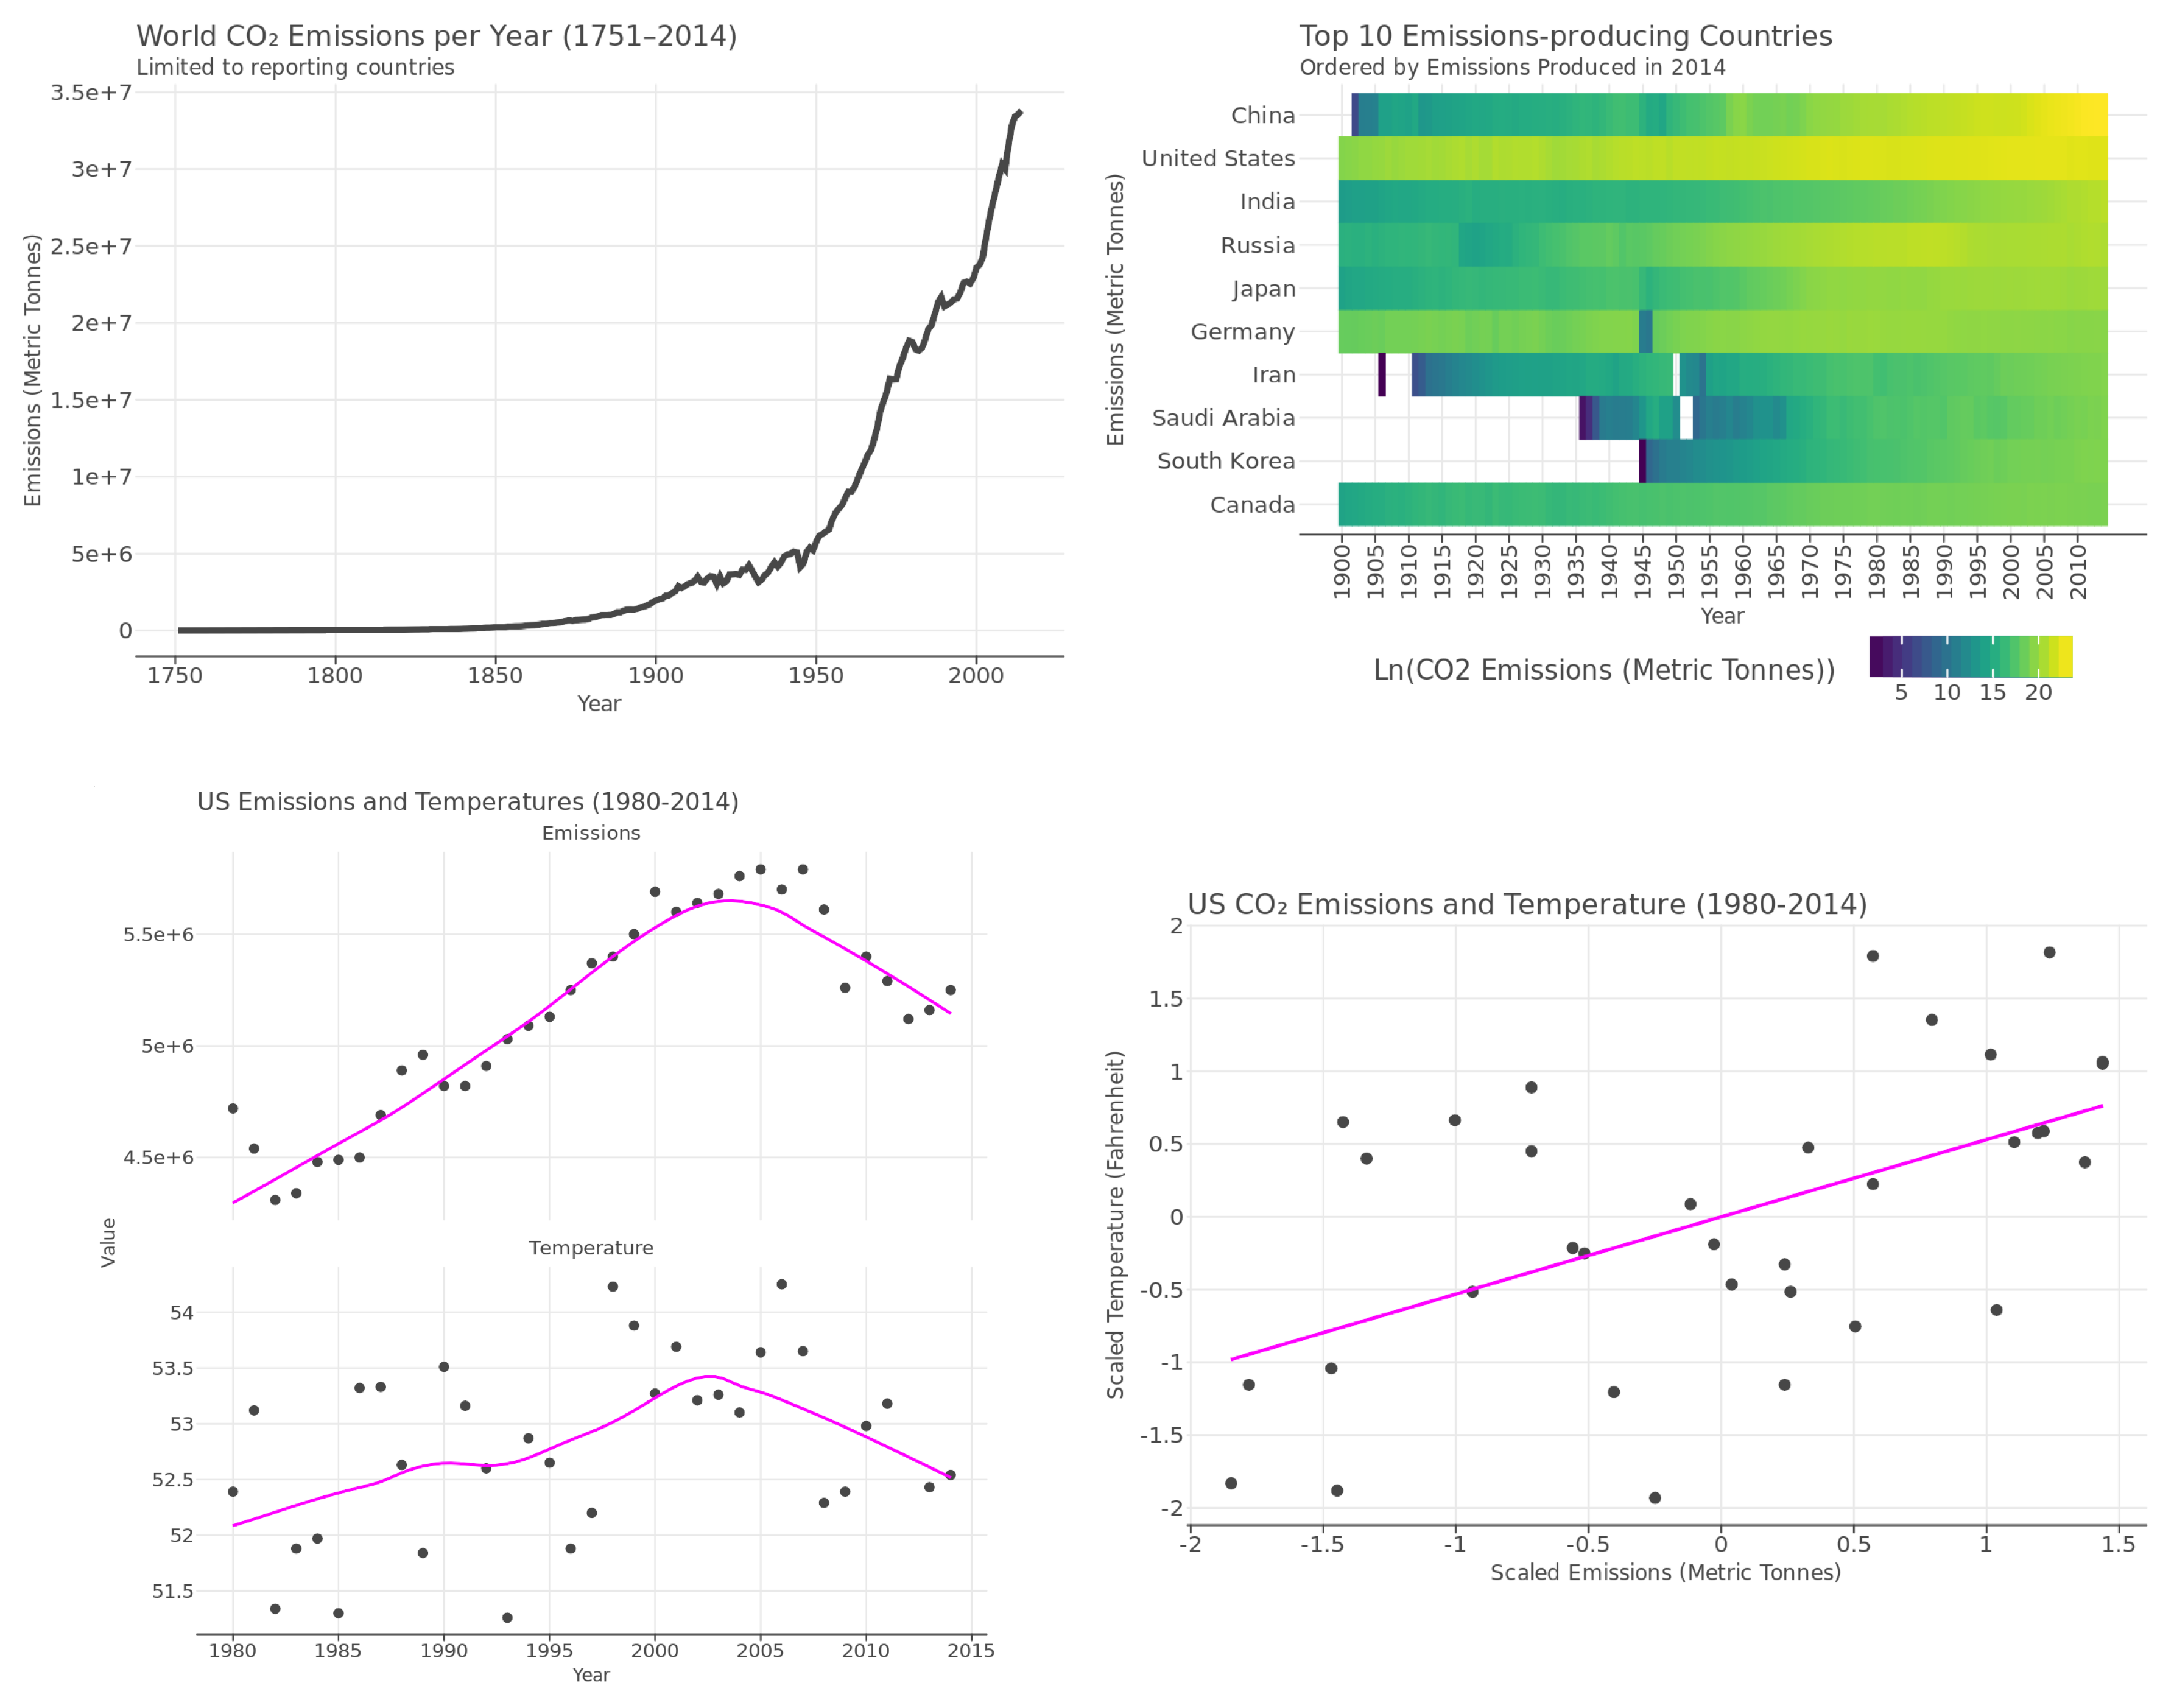

In [147]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved images
img1 = Image.open("CO2_world.png")
img2 = Image.open("CO2_tile.png")
img3 = Image.open("CO2_temp_US_facet.png")
img4 = Image.open("CO2_temp_US_scaled.png")

# Set up a 2x2 matplotlib layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=300)

# List of images and axes
images = [img1, img2, img3, img4]
axes_flat = axes.flatten()

# Plot each image
for ax, img in zip(axes_flat, images):
    ax.imshow(img)
    ax.axis('off')  # Hide axes/ticks
    ax.xaxis.set_major_formatter('{x:.0f}')

plt.tight_layout()
plt.savefig("mainplot_combined.png", dpi=300)
plt.show()